###Ishan Tripathi 21BPS1383 Assignment 5 Unsupervised ML

In [66]:
!pip install -q kaggle

In [67]:
!mkdir ~/. kaggle

mkdir: cannot create directory ‘/root/.’: File exists
mkdir: cannot create directory ‘kaggle’: File exists


In [68]:
!cp kaggle.json ~/.kaggle

In [69]:
!kaggle datasets download -d ishantripathi93/mall-customers-csv

mall-customers-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
!unzip /content/mall-customers-csv.zip

Archive:  /content/mall-customers-csv.zip
replace Mall_Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [89]:
import pandas as pd
import numpy as np

In [90]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
df.shape

(200, 5)

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le= LabelEncoder()

In [76]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [77]:
df['Gender']=le.fit_transform(df['Gender'])
df.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [79]:
new_df=df.loc[:,'Gender':'Spending Score (1-100)']
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [80]:
x=new_df.loc[:,'Age':'Spending Score (1-100)']
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [81]:
from sklearn import cluster


In [82]:
error=[]
for i in range(1,11):
  kmeans= cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(x)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [83]:
error

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75350.77917248776,
 58300.44332159069,
 51084.505954934364,
 44344.94980177718,
 40953.73845841784,
 37602.692961061926]

Text(0, 0.5, 'Error')

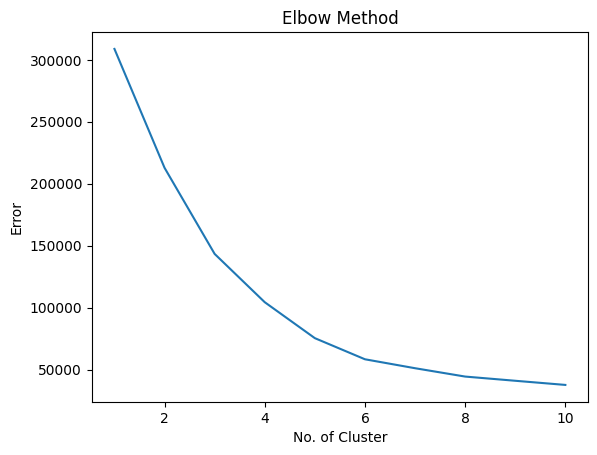

In [84]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('No. of Cluster')
plt.ylabel('Error')

In [99]:
km_model = cluster.KMeans(n_clusters=2,init = 'k-means++',random_state=0)

In [100]:
km_model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [101]:
km1= km_model.predict(x)
km1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [102]:
km_model.predict([[14,22,26]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [122]:
k=pd.DataFrame(km1)

In [123]:
df1=pd.concat([new_df,k],axis=1)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0


In [128]:
df1=df1.rename(columns={0: 'pred'})
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),pred
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0


In [129]:
df1.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
pred                      0
dtype: int64